In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

 # 1.  Determine how many different topics, and what they are, exist in an aggregation of ALL corpuses together (50 points)

### Install some packages

In [ ]:
!pip install gensim==3.8.3

     |████████████████████████████████| 24.2 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
! pip install nltk

In [ ]:
!pip install spacy

In [ ]:
!pip install tqdm

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 15.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [ ]:
!python -m spacy download en_core_web_sm

### Load libraries and data file

In [ ]:
from pprint import pprint
%matplotlib inline

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re
import gensim
from gensim.utils import simple_preprocess
import spacy
from tqdm import tqdm
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#read text corpus
df= pd.read_csv('hw2.csv')
data = pd.read_csv("hw2.csv")["body"].to_list()

### Prepare Stopwords

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]


<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:5: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:5: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:5: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:5: DeprecationWarning: invalid escape sequence \s
<ipython-input-14-5360717cefff>:2: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-14-5360717cefff>:5: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


### Tokenize words and Clean-up text

In [ ]:
data

['WASHINGTON The European Space Agency will establish a committee with representatives from both inside and outside the space industry to develop options for a European human space exploration program The creation of what ESA called a high level advisory group was one of the major outcomes of a one day space summit held in Toulouse France Feb 16 that brought together representatives of member states of both ESA and the European Union to discuss future European space initiatives Josef Aschbacher director general of ESA said the proposal for the advisory group came from French President Emmanuel Macron We got a very clear message from President Macron that such a group is needed He has asked ESA to put the group together he said at a press conference at the end of the summit In a speech earlier in the day Macron mentioned his desire to study options for a European human spaceflight program Between now and summer we want to come up with more specific European targets and ambitions for man

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [ ]:
data_words

[['washington',
  'the',
  'european',
  'space',
  'agency',
  'will',
  'establish',
  'committee',
  'with',
  'representatives',
  'from',
  'both',
  'inside',
  'and',
  'outside',
  'the',
  'space',
  'industry',
  'to',
  'develop',
  'options',
  'for',
  'european',
  'human',
  'space',
  'exploration',
  'program',
  'the',
  'creation',
  'of',
  'what',
  'esa',
  'called',
  'high',
  'level',
  'advisory',
  'group',
  'was',
  'one',
  'of',
  'the',
  'major',
  'outcomes',
  'of',
  'one',
  'day',
  'space',
  'summit',
  'held',
  'in',
  'toulouse',
  'france',
  'feb',
  'that',
  'brought',
  'together',
  'representatives',
  'of',
  'member',
  'states',
  'of',
  'both',
  'esa',
  'and',
  'the',
  'european',
  'union',
  'to',
  'discuss',
  'future',
  'european',
  'space',
  'initiatives',
  'josef',
  'aschbacher',
  'director',
  'general',
  'of',
  'esa',
  'said',
  'the',
  'proposal',
  'for',
  'the',
  'advisory',
  'group',
  'came',
  'from'

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
print(trigram_mod[bigram_mod[data_words[1]]])

['bucks_county', 'is', 'rich', 'in', 'history', 'exciting', 'entertainment', 'and', 'family', 'fun', 'bucks_county', 'is', 'home', 'to', 'many', 'places', 'to', 'stay', 'including', 'cozy', 'bed', 'and', 'breakfasts', 'and', 'contemporary', 'hotels', 'thanks', 'to', 'its', 'diverse', 'population', 'bucks_county', 'has', 'become', 'foodie', 'paradise', 'enjoy', 'fun', 'and', 'seasonal', 'festivals', 'throughout', 'bucks_county', 'bucks_county', 'charming', 'towns', 'and', 'main', 'streets', 'are', 'filled', 'with', 'fantastic', 'shopping', 'and', 'culinary', 'delights', 'calling', 'all', 'leaf_peepers', 'as', 'summer', 'fades', 'out', 'and', 'fall', 'bursts', 'in', 'one', 'of', 'the', 'most', 'picturesque', 'places', 'to', 'visit', 'is', 'bucks_county', 'pennsylvania', 'welcome', 'in', 'the', 'colorful', 'foliage', 'of', 'vibrant', 'reds', 'oranges', 'and', 'yellows', 'throughout', 'this', 'sprawling', 'countryside', 'peak', 'fall', 'foliage', 'in', 'bucks_county', 'should', 'occur', 'i

###  Remove Stopwords, Make Bigrams and Lemmatize

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

[['representative', 'outside', 'space', 'industry', 'develop', 'option', 'program', 'call', 'high', 'level', 'advisory', 'group', 'major', 'outcome', 'day', 'space', 'summit', 'hold', 'bring', 'together', 'representative', 'member', 'discuss', 'future', 'initiative', 'director', 'say', 'come', 'french', 'get', 'clear', 'message', 'need', 'ask', 'put', 'group', 'together', 'say', 'press', 'conference', 'end', 'summit', 'speech', 'early', 'day', 'mention', 'desire', 'study', 'option', 'program', 'summer', 'want', 'come', 'specific', 'european', 'target', 'ambition', 'man', 'space', 'travel', 'say', 'interpreter', 'nee', 'know', 'priority', 'datum', 'back', 'prepare', 'choice', 'go', 'take', 'ministerial', 'meeting', 'option', 'say', 'include', 'mission', 'end', 'next', 'decade', 'style', 'project', 'bold', 'ambition', 'say', 'fundamental', 'human', 'issue', 'work', 'next', 'decade', 'aschbacher', 'say', 'draft', 'group', 'present', 'member', 'start', 'work', 'immediately', 'thereafter', 

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


### Create the Dictionary and Corpus needed for Topic Modeling

In [ ]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [ ]:
start = 3
limit = 20
step = 1

log_perplexity_list = []
cohenrence_lda_list = []

for num_topics in tqdm(range(start, limit, step)):
    #print(num_topics)
    
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100,
                                               update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    
    # Compute Perplexity
    #print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
    log_perplexity_list.append(lda_model.log_perplexity(corpus))
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    #print('\nCoherence Score: ', coherence_lda)
    cohenrence_lda_list.append(coherence_lda)

100%|██████████| 17/17 [01:21<00:00,  4.80s/it]


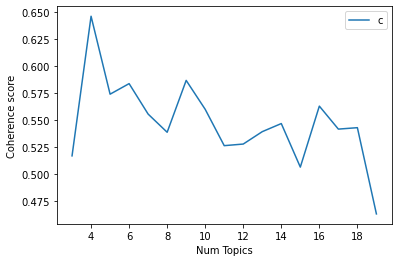

In [ ]:
x = range(start, limit, step)
plt.plot(x, cohenrence_lda_list)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# choose num_topics as the best from the plot above!

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics= 4, 
        random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.456347575034115

Coherence Score:  0.6461389861687885


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.079421 -0.182648       1        1  29.690186
1     -0.187398  0.121299       2        1  28.804586
2      0.136767  0.036726       3        1  23.067342
0      0.130052  0.024623       4        1  18.437886, topic_info=          Term        Freq       Total Category  logprob  loglift
154      space  715.000000  715.000000  Default  30.0000  30.0000
499       fish  489.000000  489.000000  Default  29.0000  29.0000
501    fishing  414.000000  414.000000  Default  28.0000  28.0000
327       tree  330.000000  330.000000  Default  27.0000  27.0000
724  steelhead  323.000000  323.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
104    mission   41.773849  200.849749   Topic4  -5.4232   0.1205
787      water   40.956217  201.148739   Topic4  -5.4430   0.0992
96        many   37.232729  172.591609   Topic4  -5.5383   0.1570
582       make   36.298689  181.352045   Topic4  -5.5637   0.0821
170       take   31.491100  160.540475   Topic4  -5.7058   0.0619

[279 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
197       2  0.233372     air
197       3  0.084862     air
197       4  0.678900     air
347       1  0.376009   allow
347       2  0.159081   allow
...     ...       ...     ...
794       1  0.231844    year
794       2  0.271971    year
794       3  0.405727    year
794       4  0.089171    year
338       2  0.995512  yellow

[449 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

# 2. Once you get a the list of topics, assign each corpus to a topic through an automated tagging process (assign each corpus to a topic) of your choice (50 points)

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=coherence_model_lda, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

NameError: ignored